In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../dataset/rossmann.csv', skipinitialspace=True,low_memory=False)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

store1_data = data[data.Store == 1]

data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [3]:
data.index.year

array([2015, 2015, 2015, ..., 2013, 2013, 2013], dtype=int32)

In [4]:
import seaborn as sb
%matplotlib inline

In [5]:
data[['Sales']].resample('M').mean().sort_values(by='Sales')

,Sales
Date,
2013-01-31,5211.555578
2013-09-30,5322.988430
2013-05-31,5364.127383
2013-06-30,5402.162960
2013-10-31,5429.258788
2014-01-31,5431.875799
2015-05-31,5472.122002
2013-04-30,5483.749836
2013-02-28,5494.371397


In [6]:
store1_data.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name=u'Date', length=942, freq=None)

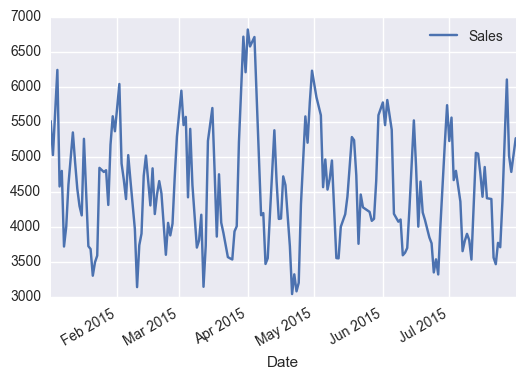

In [7]:
store1_data_2015 = store1_data['2015']
store1_data_2015[
    store1_data_2015.Open==1
][['Sales']].plot()

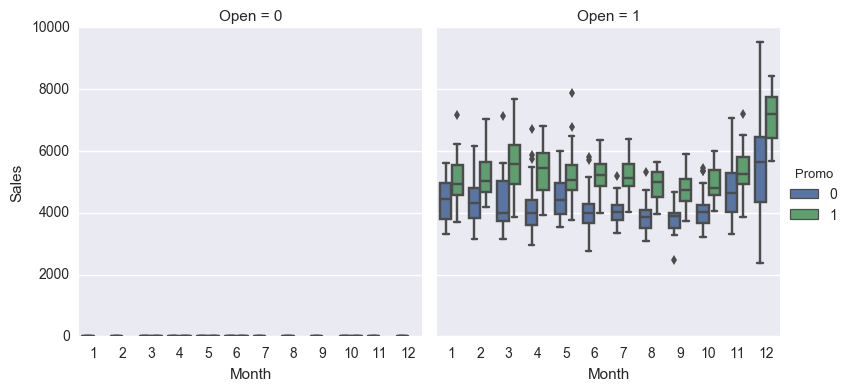

In [8]:
sb.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data, 
    kind='box'
)

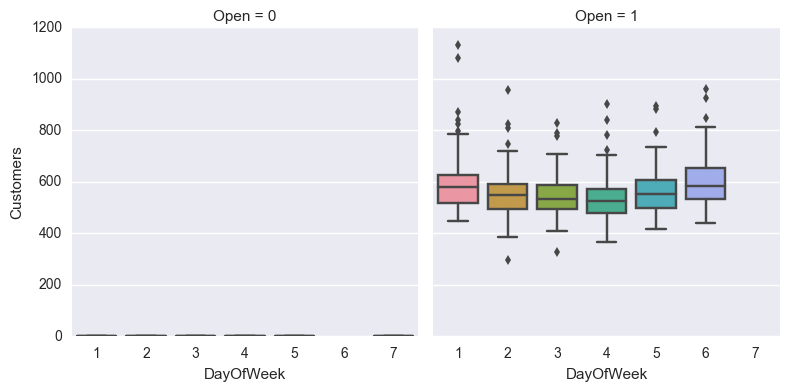

In [9]:
sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Customers',
    data=store1_data,
    kind='box',
    
)

In [10]:
data[['Sales']].resample('D').mean().rolling(window=15, center=False).mean().diff(1).sort_values(by='Sales')

,Sales
Date,
2014-01-01,-773.446039
2015-01-01,-668.394774
2013-12-31,-663.000538
2014-01-05,-596.739073
2014-05-01,-585.158326
2015-01-04,-555.511718
2015-05-14,-551.776143
2013-04-14,-549.940867
2015-04-19,-545.842511


In [11]:
average_daily_customers = data[['Customers']].resample('D').mean()
average_daily_sales = data[['Sales', 'Open']].resample('D').mean()

In [12]:
average_daily_customers['DiffVsLastWeek'] = average_daily_customers.diff(periods=7)
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

In [13]:
average_daily_sales[average_daily_sales.Open == 1].sort_values(by='DiffVsLastWeek')

,Sales,Open,DiffVsLastWeek
Date,,,
2013-12-24,4693.101345,1.0,-7014.515695
2014-12-24,4933.386096,1.0,-5209.272727
2013-12-09,6822.938117,1.0,-4811.537220
2013-10-14,5893.636771,1.0,-4027.798206
2015-04-20,5909.294170,1.0,-4023.443049
2014-12-08,7016.058824,1.0,-3975.354011
2014-12-29,7798.316578,1.0,-3974.561497
2015-06-08,6606.978475,1.0,-3925.411659
2015-04-08,6090.268161,1.0,-3866.709417


In [14]:
average_daily_sales = data[['Sales', 'Open']].resample('D').mean()

In [15]:
average_daily_sales['Sales'].autocorr(lag=1)

-0.025858276006383588

In [16]:
average_daily_sales['Sales'].autocorr(lag=30)

-0.12984245822530618

In [17]:
data['Sales'].resample('D').mean().expanding().sum()

Date
2013-01-01    8.728456e+01
2013-01-02    6.320315e+03
2013-01-03    1.201343e+04
2013-01-04    1.796765e+04
2013-01-05    2.330540e+04
2013-01-06    2.343446e+04
2013-01-07    3.314464e+04
2013-01-08    4.099167e+04
2013-01-09    4.793929e+04
2013-01-10    5.489130e+04
2013-01-11    6.210144e+04
2013-01-12    6.749829e+04
2013-01-13    6.762748e+04
2013-01-14    7.290711e+04
2013-01-15    7.785114e+04
2013-01-16    8.259825e+04
2013-01-17    8.742924e+04
2013-01-18    9.293329e+04
2013-01-19    9.832360e+04
2013-01-20    9.845956e+04
2013-01-21    1.063170e+05
2013-01-22    1.137792e+05
2013-01-23    1.207268e+05
2013-01-24    1.273993e+05
2013-01-25    1.343775e+05
2013-01-26    1.396231e+05
2013-01-27    1.397512e+05
2013-01-28    1.450236e+05
2013-01-29    1.499139e+05
2013-01-30    1.552141e+05
                  ...     
2015-07-02    5.272519e+06
2015-07-03    5.280170e+06
2015-07-04    5.285600e+06
2015-07-05    5.285841e+06
2015-07-06    5.292604e+06
2015-07-07    5.298337e

In [18]:
data['2013-01-01'].Sales.sum()

97235

In [19]:
total_daily_sales = data[['Sales']].resample('D').sum()

total_daily_sales.expanding().sum()['2014-12']

,Sales
Date,
2014-12-01,4.291837e+09
2014-12-02,4.300681e+09
2014-12-03,4.308939e+09
2014-12-04,4.317493e+09
2014-12-05,4.327295e+09
2014-12-06,4.333774e+09
2014-12-07,4.333971e+09
2014-12-08,4.340531e+09
2014-12-09,4.346861e+09


In [20]:
total_daily_sales.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name=u'Date', length=942, freq='D')